In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler
tengasé la ecuación diferencial
$$
\dot x = \frac{dx}{dt}= f(x,t)
$$
entonces conociendo el tiempo y posición incial podemos estimar la sigueinte posición
$$
x_1 = x_0 + \Delta t \dot x = x_0 + \Delta t f(x_0, t_0)
$$
entonces la ecuación la convertimos en un mapeo, que evoluciona los puntos $x_n, t_n$
$$
x_{n+1} = x_n + \Delta t f(x_n, t_n)
$$

### 1era Aplicación
Comencemos por algo simple:

1) un tanque tiene una altura $H$ de agua, pierde el 20% del agua cada día debido a un agujero:
$$
- \frac{dH}{dt} = 0.2 H
$$

$$
\dot H = - 0.2 H
$$

In [2]:
def Hdot(H): # no depende del tiempo, solo la altura
    return  - 0.2 * H

In [10]:
T = 30 # 30 dias
dt = 0.5 # pasos de tiempo, medir cada dia, cada medio dia..
np.arange(0, T + dt, dt)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. ])

In [29]:
H_0 = 100

T = 30 # 30 dias
deltat = 1 # pasos de tiempo, medir cada dia, cada medio dia..
t_list = np.arange(0, T, deltat) # podemos crear previamente el tiempo

H_list = [] # aqui ira la altura que vamos registrando, partimos con 100 m

# Euler:
H_t = H_0
for t in t_list:
    # guardamos el punto en la lista
    H_list.append(H_t)

    # aqui actualizamos
    H_t_plus_1 = H_t + deltat * Hdot(H_t)
    H_t = H_t_plus_1 # para la siguiente iteración

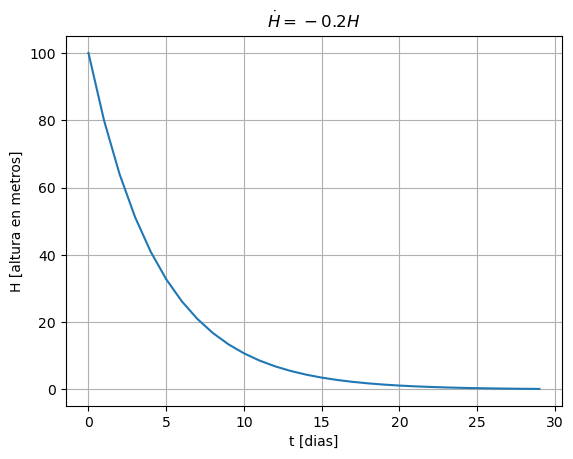

Cantidad de puntos: 30


In [30]:
plt.plot(t_list, H_list)
plt.grid()
plt.title(r'$\dot H = -0.2 H$')
plt.xlabel('t [dias]')
plt.ylabel('H [altura en metros]')
plt.show()

print(f'Cantidad de puntos: {len(t_list)}')

In [39]:
H_0 = 100

T = 30 # 30 dias
deltat = 1 # pasos de tiempo, medir cada dia, cada medio dia..

t = 0 # tiempo inicial
t_list = []
H_list = [] # aqui ira la altura que vamos registrando, partimos con 100 m

# Euler:
H_t = H_0
while ( t < T): # cuando pasara T cantidad de tiempo, se detiene
    # guardamos el punto en la lista
    t_list.append(t)
    H_list.append(H_t)

    # aqui actualizamos
    H_t_plus_1 = H_t + deltat * Hdot(H_t)
    H_t = H_t_plus_1 # para la siguiente iteración

    t += deltat # aumenta el tiempo

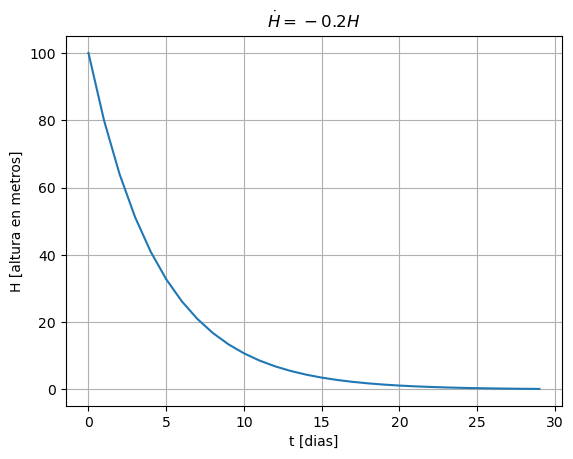

Cantidad de puntos: 30


In [40]:
plt.plot(t_list, H_list)
plt.grid()
plt.title(r'$\dot H = -0.2 H$')
plt.xlabel('t [dias]')
plt.ylabel('H [altura en metros]')
plt.show()

print(f'Cantidad de puntos: {len(t_list)}')

### escribiendo una función que nos permita crear con facilidad esto

In [74]:
def euler(dt, T, xdot, x_0, t=0):
    """
    dt es el time step, T es el limite de tiempo
    xdot es la función, x_0 es el valor inicial de x
    """
    t_list = []
    x_list = [] 

    # Euler:
    x_n = x_0
    while ( t < T): # cuando pasara T cantidad de tiempo, se detiene
        # guardamos el punto en la lista
        t_list.append(t)
        x_list.append(x_n)

        # aqui actualizamos
        x_n_plus_1 = x_n + dt * xdot(x_n)
        x_n = x_n_plus_1 # para la siguiente iteración

        t += dt # aumenta el tiempo
    
    return t_list, x_list, len(x_list)

existe una diferencia dependiendo de cuantos puntos utilizamos

In [76]:
dt = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

t_list, H_list,   n  = euler(dt=dt[0], T=30, xdot=Hdot, x_0=H_0, t=0)
t_list1, H_list1, n1 = euler(dt=dt[1], T=30, xdot=Hdot, x_0=H_0, t=0)
t_list2, H_list2, n2 = euler(dt=dt[2], T=30, xdot=Hdot, x_0=H_0, t=0)
t_list3, H_list3, n3 = euler(dt=dt[3], T=30, xdot=Hdot, x_0=H_0, t=0)
t_list4, H_list4, n4 = euler(dt=dt[4], T=30, xdot=Hdot, x_0=H_0, t=0)
t_list5, H_list5, n5 = euler(dt=dt[5], T=30, xdot=Hdot, x_0=H_0, t=0)

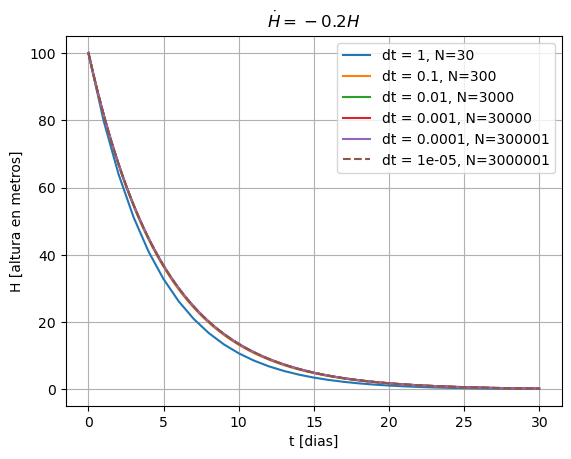

In [80]:
plt.plot(t_list,  H_list,    label=f'dt = {dt[0]}, N={n }')
plt.plot(t_list1,  H_list1,  label=f'dt = {dt[1]}, N={n1}')
plt.plot(t_list2,  H_list2,  label=f'dt = {dt[2]}, N={n2}')
plt.plot(t_list3,  H_list3,  label=f'dt = {dt[3]}, N={n3}')
plt.plot(t_list4,  H_list4,  label=f'dt = {dt[4]}, N={n4}')
plt.plot(t_list5,  H_list5, '--',  label=f'dt = {dt[5]}, N={n5}')


plt.legend()
plt.grid()
plt.title(r'$\dot H = -0.2 H$')
plt.xlabel('t [dias]')
plt.ylabel('H [altura en metros]')
plt.show()


### crecimiento de una bacteria

Krce, L., Šprung, M., Maravić, A., & Aviani, I. (2019). A simple interaction-based E. coli growth model. Physical biology, 16(6), 066005. https://doi.org/10.1088/1478-3975/ab3d51

Llegan a un modelo para la concentración de bacterias:
$$
\frac{d b(t)}{dt} = k_m \cdot q(x) \cdot b(t) \cdot [1 + b_0 - b(t)]
$$


- $B(t)$ concentracion de bacterias
- $b(t)$ densidad de bacterias reducida (por $N_0$ )
- $N_0$ concentracion de nutrientes inicial
- $k_m$ constante de fuerza a la Interaccion Bacteria-Nutrientes $k_m = 0.021 \frac{1}{min}$
- $q(x)$ funcion de respuesta sobre la concentracion de nutrientes inicial

donde podemos trabajar con la concentracion de nutrientes $n$:

$k_m \cdot q(x) = k_m \frac{1}{n_{1/2} + n} $
 
- $n_{1/2} = 0.121$ es la concentracion de nutrientes donde el crecimiento es la mitad del maximo
- $n(t) \approx n_0$ la concentracion de nutrientes casi no cambia





In [91]:
b_0 = 0.05 # initial density bacteria (normali b_0 << n)
n = 0.9 # initial nutrient size

def bdot(b_t, n= n, b_0 = b_0):
    km = 0.021
    n_12 = 0.121
    return km * (1/(n_12 + n)) * b_t * ( 1 + b_0 - b_t )

In [96]:
t_list, b_list, N = euler(dt = 0.01, T=1500, xdot=bdot, x_0 = b_0, t=0)

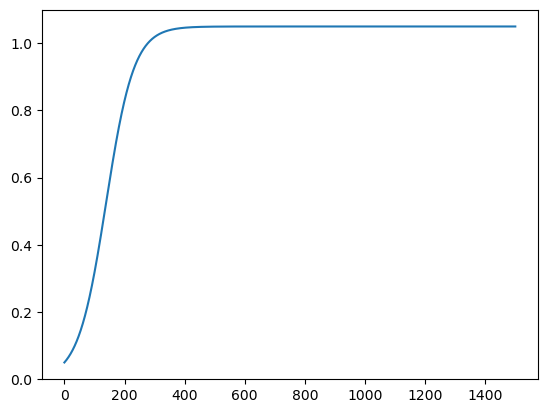

In [97]:
plt.plot(t_list, b_list)

es necesario actualizar la cantidad de nutrientes, las ecuaciones separadas son:

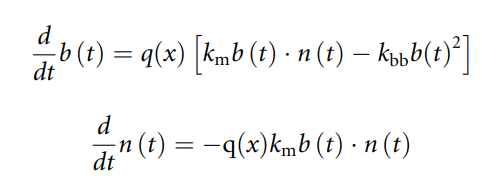

- $k_{bb} \approx 1.96 \times 10^{-4} \frac{1}{min}$ interaccion entre bacterias, para este modelo se deja en 0 para compararlo al modelo logistico
- $k_m = 1.94 \times 10^{-2} \frac{1}{min}$ interaccion bacteria nuriente

In [109]:
k_m = 1.94e-2
kbb = 1.96e-4

def q(x):
    x_12 = 0.093
    return x / (x_12 + x)

def bdot(b_t, n_t, x):
    return q(x) * ( k_m * b_t * n_t - kbb * b_t * b_t )

def ndot(b_t, n_t, x):
    return - q(x) * k_m * b_t * n_t

In [108]:
b_0 = 0.2 # concentracion inicial bact
n_0 = 1 # concentracion inicial nutrientes

x = 0.9

t, dt = 0, 5
T = 900
t_list = []
b_list = []
n_list = []

In [110]:
b_t = b_0
n_t = n_0
while (t<T):
    t_list.append(t) # add points
    b_list.append(b_t)
    n_list.append(n_t)

    # euler
    b_tp1 = b_t + dt * bdot(b_t, n_t, x)
    n_tp1 = n_t + dt * ndot(b_t, n_t, x)
    b_t = b_tp1
    n_t = n_tp1


MemoryError: 

In [ ]:
plt.plot(t_list, b_list, label='densidad bacteria')
plt.plot(t_list, n_list, label='densidad nutriente')
plt.legend()
plt.grid()
plt.xlabel('t [min]')
plt.plot()